In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
sns.set(style="darkgrid")
import sys
sys.path.append('../../src')
sys.path.append('../../src/Vrama')
from Vrama import Eye
import time
from scipy import stats

In [5]:
def GetSubjectData(subjectID):
    dfAll = Eye.LoadEyeData(subjectID)
    dfList = Eye.GetDfList(dfAll)
    df_scores_all = pd.DataFrame()
    df_scores_on = pd.DataFrame()
    df_scores_off = pd.DataFrame()

    for i in dfList:
        df = Eye.PreProcessDf(i)
        dfOn = Eye.GetDistractorOn(df)
        dfOff = Eye.GetDistractorOff(df)
        df_scores_all = df_scores_all.append(Eye.GetScores(df,df))
        df_scores_on = df_scores_on.append(Eye.GetScores(dfOn,df))
        df_scores_off = df_scores_off.append(Eye.GetScores(dfOff,df))

        data_dict = {   'subjectID': subjectID,
                    'dfAll': dfAll,
                    'df_scores_all':df_scores_all,
                    'df_scores_on':df_scores_on,
                    'df_scores_off':df_scores_off           
                        }
    return data_dict


In [6]:
resultsList = []
subjList = ['19202','19205','19201']
for i in subjList:
    resultsList.append(GetSubjectData(i))

C:\Users\Greco\Anaconda3\envs\vram\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Object TYPE gaze duration

In [10]:
results = resultsList[2]
df = Eye.PreProcessDf(results['dfAll'])
df_hold = pd.DataFrame()
df_hold['object'] = df['Active Gaze Object Name']
df_hold['deltaTime'] = df['deltaTime']
df_object_duration = df_hold.groupby('object').sum().reset_index()
df_object_type_duration = Eye.GetObjectDurDf2(df_object_duration,df)
dfByType_p = df_object_type_duration.groupby('Type').sum().apply(lambda x:100 * x / float(x.sum())).reset_index()
dfByType_s = df_object_type_duration.groupby('Type').sum().reset_index()
scores = Eye.GetScores(df,df)

In [11]:
df_object_type_duration

,Name,Duration,Type
0,Alexander,3.004257e+03,other
1,BackWallCollider,3.331158e+02,other
2,Bus002,1.994653e+02,other
3,Cameron,2.261637e+03,other
4,CeilingCollider,1.639399e+04,other
5,Chair_GRP005,7.421627e+02,other
6,Chair_GRP006,8.975700e+00,other
7,Chair_GRP007,2.234490e+02,other
8,Chair_GRP008,7.372715e+02,other
9,Chair_GRP009,8.679663e+02,other


In [12]:
dfByType_p

,Type,Duration
0,distractor,3.794968
1,other,40.922454
2,white board,55.282577


In [13]:
dfByType_s

,Type,Duration
0,distractor,8.254491e+04
1,other,8.901103e+05
2,white board,1.202459e+06


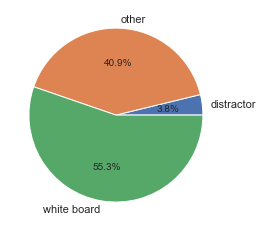

In [14]:
dur = dfByType_s.Duration
lab = dfByType_s.Type
plt.pie(dur, labels=lab, autopct='%.1f%%')
plt.show()

In [84]:
# Total task time (min)
scores.iloc[0,1:2]

Task_duration(min)    36.2519
Name: 0, dtype: object

In [85]:
# Percentage of time spent looking at distractors, the whiteboard and other
scores.iloc[0,2:5]

View_duration_distractor(%)    3.79497
View_duration_other(%)         40.9225
View_duration_whiteboard(%)    55.2826
Name: 0, dtype: object

In [86]:
# Total time (ms) spent looking at distractors, the whiteboard and other
scores.iloc[0,5:9]

View_duration_distractor(ms)                                              82544.9
View_duration_other(ms)                                                    890110
View_duration_whiteboard(ms)                                          1.20246e+06
Object_list                     [WhiteBoardWithDisplay, Null, FrontWall, White...
Name: 0, dtype: object

In [101]:
# All objects seen during this period
pd.DataFrame({'objects':scores['Object_list'].tolist()[0]})

,objects
0,WhiteBoardWithDisplay
1,Null
2,FrontWall
3,Whiteboard1
4,Quinn
5,ProjectorPodium
6,Child006
7,Alexander
8,Chair_GRP007
9,Chair_GRP009


In [102]:
# All objects seen during this period
pd.DataFrame({'distractors':scores['Distractor_list'].tolist()[0]})

,distractors
0,NaN
1,Child009
2,Child002
3,Child001
4,iPhoneX
5,iPhoneX2
6,Child005
7,BusSouth
8,NewestTeacher
9,Child006


In [15]:
# distractors this participant looked at
df_object_type_duration[df_object_type_duration.Type == 'distractor']

,Name,Duration,Type
10,Child001,375.6571,distractor
11,Child002,903.5295,distractor
12,Child005,48669.6768,distractor
13,Child006,18424.8042,distractor
14,Child008,293.3007,distractor
15,Child009,9687.3104,distractor
32,Pedestrian,2631.7354,distractor
57,iPhoneX,1558.8981,distractor


In [17]:
# we can calculate scores for separate task blocks
results['df_scores_all']

,Task_name,Task_duration(min),View_duration_distractor(%),View_duration_other(%),View_duration_whiteboard(%),View_duration_distractor(ms),View_duration_other(ms),View_duration_whiteboard(ms),Object_list,Distractor_list
0,VerbalStroop,4.027628,3.144518,58.646940,38.208543,7598.9684,141724.8361,92333.8791,"[WhiteBoardWithDisplay, Null, FrontWall, White...","[nan, Child009, Child002, Child001, iPhoneX, i..."
0,AX-CPT,4.004604,3.144428,57.408058,39.447515,7555.3121,137937.9213,94783.0034,"[Null, WhiteBoardWithDisplay, FrontWall, Ceili...","[nan, Child006, BusSouth, Child005, Car, BusNo..."
0,Math,4.058024,1.474856,35.335265,63.189879,3591.0006,86034.8081,153855.6234,"[Null, WhiteBoardWithDisplay, Child005, Desk00...","[nan, Child006, iPhoneX2, Child002, Child009, ..."
0,VerbalStroop,4.018056,5.005545,35.676004,59.318451,12067.5357,86008.9029,143006.9036,"[FrontWall, WhiteBoardWithDisplay, UCDavisTeac...","[nan, Child001, Child009, Child005, Child002, ..."
0,AX-CPT,4.006428,1.345584,38.279691,60.374724,3234.5922,92018.8919,145132.1847,"[Null, Child005, CeilingCollider, WhiteBoardWi...","[nan, Child001, Child006, NewestTeacher, Child..."
0,Math,4.057405,0.189690,25.063516,74.746794,461.7891,61015.6986,181966.7981,"[WhiteBoardWithDisplay, Whiteboard1, Child005,...","[nan, Child002, NewestTeacher, iPhoneX, Child0..."
0,VerbalStroop,4.016615,4.794814,34.150310,61.054876,11555.3524,82301.1887,147140.3566,"[WhiteBoardWithDisplay, Null, FrontWall, Kevin...","[nan, NewestTeacher, Child008, Child002, Child..."
0,AX-CPT,4.005554,1.655596,66.137309,32.207095,3978.9477,158949.9429,77404.3561,"[WhiteBoardWithDisplay, FrontWall, Null, Groun...","[nan, iPhoneX, Pedestrian, Child009, Child006,..."
0,Math,4.057598,0.864566,30.607064,68.528370,2104.8356,74514.6961,166836.3431,"[WhiteBoardWithDisplay, Null, UCDavisTeacher, ...","[nan, Car, Child008, Child006, iPhoneX, Child009]"


In [111]:
# we can calculate scores for separate task blocks filtered by Distraction On
i['df_scores_on']

,Task_name,Task_duration(min),View_duration_distractor(%),View_duration_other(%),View_duration_whiteboard(%),View_duration_distractor(ms),View_duration_other(ms),View_duration_whiteboard(ms),Object_list,Distractor_list
0,VerbalStroop,1.602096,3.196990,57.883568,38.919442,3073.1312,55641.0175,37411.6079,"[WhiteBoardWithDisplay, Null, FrontWall, White...","[nan, Child009, Child002, Child001, iPhoneX, i..."
0,AX-CPT,1.578244,3.885230,58.660452,37.454317,3679.1047,55548.2996,35467.2277,"[Null, WhiteBoardWithDisplay, FrontWall, Ceili...","[nan, Child006, BusSouth, Child005, Car, BusNo..."
0,Math,1.671088,3.581501,31.183922,65.234577,3591.0006,31266.6381,65407.6139,"[Null, WhiteBoardWithDisplay, Child005, Desk00...","[nan, Child006, iPhoneX2, Child002, Child009, ..."
0,VerbalStroop,1.704065,7.439873,43.092566,49.467561,7606.8184,44059.5315,50577.5765,"[FrontWall, WhiteBoardWithDisplay, UCDavisTeac...","[nan, Child001, Child009, Child005, Child002, ..."
0,AX-CPT,1.833420,2.697423,36.148840,61.153737,2967.3059,39765.6044,67272.2921,"[Null, Child005, CeilingCollider, WhiteBoardWi...","[nan, Child001, Child006, NewestTeacher, Child..."
0,Math,1.297342,0.562499,30.912394,68.525108,437.8519,24062.3677,53340.2995,"[WhiteBoardWithDisplay, Whiteboard1, Child005,...","[nan, Child002, NewestTeacher, iPhoneX, Child0..."
0,VerbalStroop,1.999179,5.864504,36.796592,57.338904,7034.5157,44137.7829,68778.4382,"[WhiteBoardWithDisplay, Null, FrontWall, Kevin...","[nan, NewestTeacher, Child008, Child002, Child..."
0,AX-CPT,1.756636,2.552431,64.781332,32.666237,2690.2156,68278.3381,34429.6164,"[WhiteBoardWithDisplay, FrontWall, Null, Groun...","[nan, iPhoneX, Pedestrian, Child009, Child006,..."
0,Math,1.430223,2.009993,33.421445,64.568561,1724.8429,28680.0689,55408.4589,"[WhiteBoardWithDisplay, Null, UCDavisTeacher, ...","[nan, Car, Child008, Child006, iPhoneX, Child009]"


In [112]:
# we can calculate scores for separate task blocks filtered by Distraction Off
i['df_scores_off']

,Task_name,Task_duration(min),View_duration_distractor(%),View_duration_other(%),View_duration_whiteboard(%),View_duration_distractor(ms),View_duration_other(ms),View_duration_whiteboard(ms),Object_list,Distractor_list
0,VerbalStroop,2.425532,3.109859,59.151157,37.738984,4525.8372,86083.8186,54922.2712,"[WhiteBoardWithDisplay, Null, FrontWall, White...","[nan, Child009, Child002, Child001, iPhoneX, i..."
0,AX-CPT,2.426360,2.662567,56.593429,40.744005,3876.2074,82389.6217,59315.7757,"[Null, WhiteBoardWithDisplay, FrontWall, Ceili...","[nan, Child006, BusSouth, Child005, Car, BusNo..."
0,Math,2.386936,0.000000,38.241608,61.758392,0.0000,54768.1700,88448.0095,"[Null, WhiteBoardWithDisplay, Child005, Desk00...","[nan, Child006, iPhoneX2, Child002, Child009, ..."
0,VerbalStroop,2.313990,3.212861,30.214310,66.572829,4460.7173,41949.3714,92429.3271,"[FrontWall, WhiteBoardWithDisplay, UCDavisTeac...","[nan, Child001, Child009, Child005, Child002, ..."
0,AX-CPT,2.173008,0.205005,40.077543,59.717452,267.2863,52253.2875,77859.8926,"[Null, Child005, CeilingCollider, WhiteBoardWi...","[nan, Child001, Child006, NewestTeacher, Child..."
0,Math,2.760063,0.014455,22.314306,77.671240,23.9372,36953.3309,128626.4986,"[WhiteBoardWithDisplay, Whiteboard1, Child005,...","[nan, Child002, NewestTeacher, iPhoneX, Child0..."
0,VerbalStroop,2.017436,3.734804,31.527977,64.737219,4520.8367,38163.4058,78361.9184,"[WhiteBoardWithDisplay, Null, FrontWall, Kevin...","[nan, NewestTeacher, Child008, Child002, Child..."
0,AX-CPT,2.248918,0.955076,67.196467,31.848457,1288.7321,90671.6048,42974.7397,"[WhiteBoardWithDisplay, FrontWall, Null, Groun...","[nan, iPhoneX, Pedestrian, Child009, Child006,..."
0,Math,2.627375,0.241047,29.075044,70.683909,379.9927,45834.6272,111427.8842,"[WhiteBoardWithDisplay, Null, UCDavisTeacher, ...","[nan, Car, Child008, Child006, iPhoneX, Child009]"


## Unnecessary, preliminary stats

For each of the three datasets, lets compute a paired t-test statistic, **Distractor On** (% of distractor view duration) vs **Distractor Off** (% of distractor view duration) 

In [56]:
for i in resultsList:
    print(i['subjectID'])
    print(stats.ttest_rel(i['df_scores_on']['View_duration_distractor(%)'],i['df_scores_off']['View_duration_distractor(%)']))  

19202
Ttest_relResult(statistic=1.7448832185705643, pvalue=0.12451898959684793)
19205
Ttest_relResult(statistic=3.2002393793198145, pvalue=0.015060802543077916)
19201
Ttest_relResult(statistic=4.402630661792442, pvalue=0.0022787288021962277)
